In [1]:
import os
import yaml
import json
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
yaml_path = "./yaml_data"
yaml_files = [os.path.join(yaml_path,f) for f in os.listdir(yaml_path) if os.path.isfile(os.path.join(yaml_path, f))]

In [3]:
# create pandas df

df = pd.DataFrame()

for y_file in yaml_files:
    with open(y_file) as f:
        y_dict = yaml.load(f)
        tmp = pd.io.json.json_normalize(y_dict["donneesNationales"])
        tmp["date"] = pd.to_datetime(y_dict["date"])
        #print(tmp)
        df = pd.concat((df, tmp), axis="index")

#print(df[usefulCols])
df["date"].dtype

C:\Users\Andrea\Anaconda2\envs\multipoetgen\lib\site-packages\ipykernel\__main__.py:7: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
C:\Users\Andrea\Anaconda2\envs\multipoetgen\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


dtype('<M8[ns]')

In [4]:
df.decesEhpad.fillna(0, inplace=True)
df.casConfirmesEhpad.fillna(0, inplace=True)

In [5]:
df.casConfirmesEhpad

0        0.0
0        0.0
0        0.0
0        0.0
0        0.0
      ...   
0    44471.0
0    44471.0
0    44471.0
0    45090.0
0    45090.0
Name: casConfirmesEhpad, Length: 238, dtype: float64

In [6]:
usefulCols = ["date", "casConfirmes", "deces", "decesEhpad", "hospitalises", "reanimation", "gueris", "casConfirmesEhpad", "nouvellesHospitalisations", "nouvellesReanimations"]
df = df[usefulCols].reset_index()

In [7]:
df.to_csv("fr_data_raw.csv")

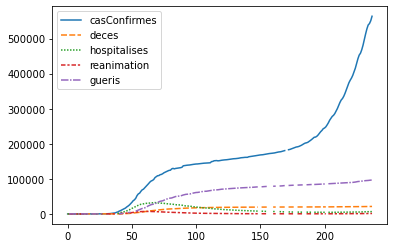

In [8]:
#g = sns.lineplot(data=df.drop("date", axis=1))
plotCols = ["casConfirmes", "deces", "hospitalises", "reanimation", "gueris"]
g = sns.lineplot(data=df[plotCols])

In [9]:
p_df = pd.DataFrame()

p_df["data"] = df["date"]
p_df["stato"] = "FR"
p_df["totale_casi"] = df["casConfirmes"] + df["casConfirmesEhpad"]
p_df["deceduti"] = df["deces"] + df["decesEhpad"]
p_df["totale_positivi"] = p_df["totale_casi"] - df["gueris"] - p_df["deceduti"]
p_df["totale_ospedalizzati"] = df["hospitalises"]
p_df["terapia_intensiva"] = df["reanimation"]
p_df["ricoverati_con_sintomi"] = df["hospitalises"] - df["reanimation"]
p_df["isolamento_domiciliare"] = p_df["totale_positivi"] - p_df["totale_ospedalizzati"]
p_df["dimessi_guariti"] = df["gueris"]


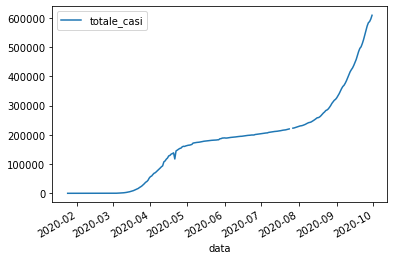

In [10]:
cols = ["totale_casi", "totale_positivi", "totale_ospedalizzati", "ricoverati_con_sintomi", "dimessi_guariti", "terapia_intensiva"]
# g = sns.lineplot("data", data=p_df[cols])
p_df.plot(x="data", y="totale_casi")

In [11]:
p_df.to_csv("./fr_data_processed.csv")

In [ ]:
p_df.iloc[75]